# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_url = eth_url + "?format=json"
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14070.50
The current value of your 5.3 ETH is $2006.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_prices = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_prices.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_prices['AGG']['close'].item()
spy_close_price = df_prices['SPY']['close'].item()

In [13]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [14]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

In [15]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = my_btc_value + my_eth_value
stock_value = my_agg_value + my_spy_value
assets = ['crypto','shares']
df_savings = pd.DataFrame([crypto_value,stock_value],index=assets,columns=['amount'])

In [17]:
# Display savings DataFrame
display(df_savings)

amount
crypto  16076.554
shares  40938.500

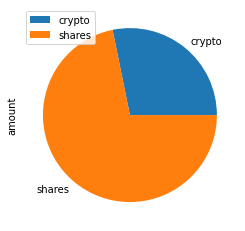

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings['amount'].sum()

# Validate saving health
if savings > emergency_fund:
    print("Congratulations you have more than enough emergency funds! Please consider our premium investment products for your excess cash.")
elif savings == emergency_fund:
    print("Congratulations you have enough savings for emergencies!")
else:
    deficit = emergency_fund - savings
    print(f"You do not have enough savings. You will need ${deficit} to reach financial security")

Congratulations you have more than enough emergency funds! Please consider our premium investment products for your excess cash.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [93]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2         3         4         5         6    \
0      1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1      1.000397  1.005454   1.000055  0.993261  1.006287  0.999051  1.002678   
2      1.005759  1.009481   0.997076  0.997500  1.006584  1.008239  1.010880   
3      1.008147  1.000267   1.004857  0.980255  1.005153  1.009996  0.990339   
4      1.012606  0.993520   0.998094  0.982443  1.000382  1.018309  0.992785   
...         ...       ...        ...       ...       ...       ...       ...   
7556  31.343668  9.173243  17.300594  6.688113  8.741620  1.595123  8.906607   
7557  31.316511  9.116768  17.345569  6.692969  8.717232  1.584120  8.922011   
7558  31.530926  9.139660  17.312908  6.657414  8.762566  1.575460  8.927208   
7559  31.556959  9.024146  17.236315  6.718364  8.802303  1.578965  8.751600   
7560  31.574190  8.959472  16.924759  6.759351  8.797502  1.595104  8.809934   

            7          8         9    ...       490       491       492  \
0      1.000000   1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1      1.001271   1.004964  0.998788  ...  1.001635  1.002664  1.000110   
2      0.996529   1.000204  1.003513  ...  1.006347  0.998572  0.989291   
3      0.988644   1.007632  1.009388  ...  1.007665  0.983625  0.996041   
4      0.994985   1.005609  1.007055  ...  1.007379  0.977818  0.999187   
...         ...        ...       ...  ...       ...       ...       ...   
7556  14.164632  12.858080  5.466758  ...  5.679406  4.314894  3.376312   
7557  14.156866  12.960248  5.456486  ...  5.686982  4.363524  3.382242   
7558  14.092877  12.856677  5.450513  ...  5.702093  4.371521  3.382520   
7559  14.138179  12.818422  5.415074  ...  5.691578  4.404537  3.334241   
7560  14.121755  12.930806  5.402322  ...  5.689280  4.442860  3.338893   

           493        494       495       496        497       498       499  
0     1.000000   1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1     1.001295   0.993593  0.998222  1.005645   0.989119  0.996440  1.000543  
2     0.982615   0.988806  0.995620  1.007411   0.987665  0.989204  1.001784  
3     0.975842   0.994670  1.000777  1.006913   0.992289  0.983634  1.001680  
4     0.975999   0.986016  1.005775  1.008164   1.000978  0.984500  1.012893  
...        ...        ...       ...       ...        ...       ...       ...  
7556  5.550468   9.983102  3.829100  7.627713  15.501074  9.621297  3.966347  
7557  5.562403   9.921139  3.841831  7.581410  15.602619  9.733650  3.996994  
7558  5.483715  10.012910  3.891596  7.652945  15.660271  9.697226  3.954644  
7559  5.530023  10.073528  3.870550  7.654165  15.741849  9.722770  3.952540  
7560  5.596137  10.042964  3.912156  7.663791  15.838273  9.649966  3.978584  

[7561 rows x 500 columns]

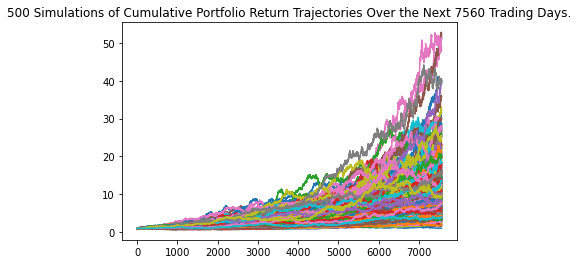

In [94]:
# Plot simulation outcomes
MC_30_year.plot_simulation()

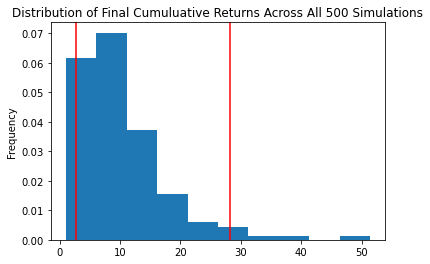

In [95]:
# Plot probability distribution and confidence intervals
MC_30_year.plot_distribution()

### Retirement Analysis

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.247858
std               7.235573
min               1.030265
25%               5.405946
50%               8.079910
75%              13.092502
max              51.427947
95% CI Lower      2.715599
95% CI Upper     28.279014
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [97]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54311.97 and $565580.29


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [98]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81467.96 and $848370.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.05,.95],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993178  1.007591  1.015496  0.990357  0.990469  0.992496  1.004038   
2     0.997221  0.989305  1.045831  0.986703  1.008603  1.010409  1.017139   
3     1.003708  0.980846  1.038459  0.995630  1.017944  1.027266  1.016589   
4     0.989473  0.968409  1.039932  0.994423  1.038610  1.049683  1.013320   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.914738  1.332215  1.559921  2.115097  1.069578  1.276198  1.023988   
1257  0.910100  1.346655  1.525680  2.124938  1.064812  1.270828  1.026195   
1258  0.907346  1.338555  1.513593  2.135078  1.066275  1.251162  1.018571   
1259  0.911913  1.312583  1.512220  2.162676  1.050114  1.255607  1.015680   
1260  0.906159  1.298375  1.506676  2.159339  1.057416  1.259961  1.038101   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.010122  1.008635  0.994329  ...  0.990590  1.009268  1.032532   
2     0.994473  1.011970  0.999384  ...  1.005957  0.991697  1.036621   
3     1.000770  1.023663  1.022328  ...  1.016945  0.991496  1.048166   
4     1.009355  1.049546  1.011171  ...  1.015119  0.999966  1.057319   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.574364  1.536497  0.885395  ...  1.543344  2.111074  2.765065   
1257  1.543805  1.535112  0.900408  ...  1.544549  2.109464  2.775061   
1258  1.498369  1.525918  0.909830  ...  1.529606  2.158674  2.792764   
1259  1.473230  1.507158  0.911980  ...  1.519405  2.184219  2.774434   
1260  1.494390  1.499631  0.930274  ...  1.501439  2.255360  2.740555   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.999515  1.009911  0.984619  0.998346  0.997978  1.021180  0.975787  
2     0.999788  1.006498  0.998391  1.001186  0.988060  1.020544  0.984056  
3     0.999756  0.996631  0.990283  1.013816  0.987648  1.031895  0.977922  
4     1.004907  1.010887  0.996266  1.016891  1.000515  1.033538  0.990766  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.024366  3.063748  1.727177  1.074361  1.378063  1.125203  0.946941  
1257  1.033444  3.053872  1.742780  1.072582  1.376050  1.121166  0.951205  
1258  1.049981  3.018193  1.764459  1.073226  1.359808  1.133216  0.961806  
1259  1.049456  2.927124  1.759487  1.063529  1.325149  1.131053  0.945406  
1260  1.054318  2.924304  1.769629  1.052373  1.311760  1.134059  0.960797  

[1261 rows x 500 columns]

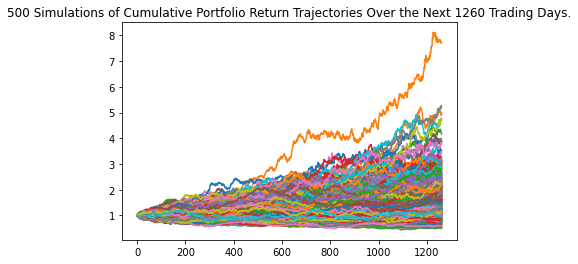

In [26]:
# Plot simulation outcomes
MC_5_year.plot_simulation()

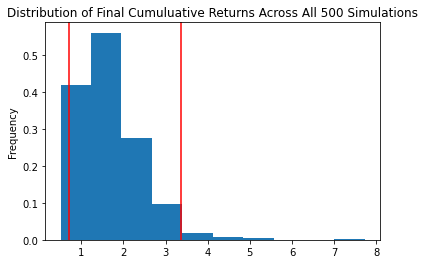

In [27]:
# Plot probability distribution and confidence intervals
MC_5_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.701834
std               0.785782
min               0.510872
25%               1.138769
50%               1.560168
75%               2.124956
max               7.726606
95% CI Lower      0.713412
95% CI Upper      3.360786
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $14268.25 and $67215.72


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.05,.95],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.975364  1.009172  1.004702  1.019962  0.996970  0.995124  0.993354   
2     0.998308  1.014786  0.979692  1.010576  1.002239  0.996757  0.977961   
3     0.979119  1.024280  0.972447  0.998728  1.000384  0.996547  0.972495   
4     0.970485  1.026908  0.979931  1.018442  1.006779  1.009802  0.994110   
...        ...       ...       ...       ...       ...       ...       ...   
2516  0.998061  5.020073  2.205339  4.012523  9.088224  4.197424  2.624363   
2517  1.001382  4.973885  2.245246  4.049344  9.265259  4.211157  2.654449   
2518  0.998032  5.054883  2.221381  4.065591  9.243355  4.243453  2.656352   
2519  1.001306  5.048041  2.203420  4.001489  9.500311  4.278236  2.635003   
2520  0.996842  5.114056  2.209990  3.991992  9.590632  4.259322  2.722404   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.015857  1.012282  1.032823  ...  0.986967  1.005703  1.006002   
2     1.026695  1.021292  1.015960  ...  1.018902  1.007996  0.996861   
3     1.011071  1.022945  1.028430  ...  1.045969  1.014104  1.012865   
4     1.014308  1.024957  1.030110  ...  1.038006  0.998387  1.022108   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.436588  1.288267  4.533940  ...  2.189155  2.420281  1.761636   
2517  2.443780  1.283947  4.483003  ...  2.156672  2.443243  1.777168   
2518  2.452401  1.290374  4.486864  ...  2.152628  2.467985  1.795900   
2519  2.454035  1.292698  4.405748  ...  2.168507  2.454215  1.825288   
2520  2.434234  1.304546  4.449744  ...  2.139311  2.496825  1.798876   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.003296  0.995287  1.000098  0.991127  1.002726  0.992506  1.000767  
2     1.011843  0.986467  0.997460  1.006376  1.007874  0.986510  1.003622  
3     1.017764  0.979424  1.003768  1.003628  1.008804  0.997676  0.981068  
4     1.007823  0.989588  0.993530  0.998840  0.996983  1.014895  0.981029  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.681878  3.636017  3.770107  5.579249  8.949309  2.483307  1.507323  
2517  1.673307  3.616369  3.689941  5.569584  9.107941  2.499184  1.510516  
2518  1.665041  3.551112  3.679064  5.601664  9.104835  2.431368  1.498733  
2519  1.664984  3.516223  3.602690  5.621254  9.175024  2.476531  1.493553  
2520  1.668957  3.483004  3.583324  5.753239  9.209199  2.471066  1.509664  

[2521 rows x 500 columns]

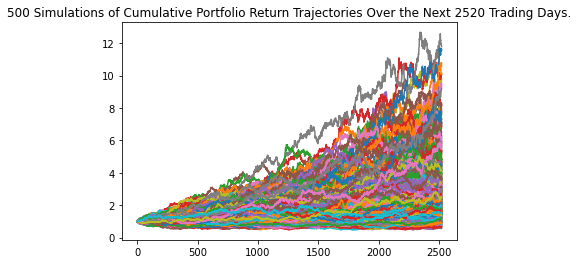

In [32]:
# Plot simulation outcomes
MC_10_year.plot_simulation()

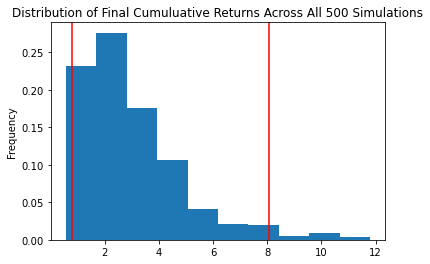

In [33]:
# Plot probability distribution and confidence intervals
MC_10_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.008447
std               1.875828
min               0.567473
25%               1.683159
50%               2.472150
75%               3.804885
max              11.795411
95% CI Lower      0.787424
95% CI Upper      8.061441
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $15748.47 and $161228.81
